# Regresión I: ¿Donde estan los ojos?

Muchos de los sistemas de reconocimiento de personas por medio de imágenes utilizan la ubicación de puntos importantes en la cara, con el objetivo de identificar la ubicación del rostro. Algunos puntos importantes son los ojos, la nariz y la boca, a partir de ellos es posible definir las coordenadas entre las cuales se encuentra ubicada la cara de la persona. El profesor Santiago siempre ha tenido una gran fascinación por estos sistemas, y dado que sus estudiantes ya saben como trabajar con redes neuronales, él ha decidido que ellos realicen un sistemas de identificación de la ubicación de los ojos a partir de imágenes.

Para la realización de este proyecto el estudiante deberá:

1. Crear una base de datos con fotografías para probar (pueden bajarse una base de datos pública también) donde diferentes personas, y en cada una de estas se debe generar un elemento que identifique la ubicación de los ojos. Aquí debe tener en cuenta dos cosas:
    * Tenga en cuenta que una red aprende con base en la información que le proporcionemos, así que al crear la base de datos tenga en cuenta todas las posibilidades que se imaginen de como podrían estar esas fotos.
    * Si tenemos imágenes muy grandes esto requerirá de una red muy grande que puede tardar mucho tiempo en entrenar. Tenga en cuenta esto por si es necesario procesar las imágenes antes de ingresarlas a la red.   
2. Definir las arquitecturas de red que debe probar (sólo MLP)
3. Escoger la red que mejor se desempeñe.
4. Evaluar el rendimiento de la red.


Tenga en cuenta que todo el procedimiento debe ser lo mas amigable para probar. Es decir si el profesor Santiago quiere probar una foto, entonces él solo debería ingresar la foto en una función la cual se encargue de hacer todo el procesamiento y proporcionar como salida si la persona tiene o no tapabocas.

Además el profesor quiere que contesten las siguientes preguntas:

1. ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?
2. ¿Qué criterio utilizo para seleccionar la arquitectura de la red?
3. ¿Tiene la red el comportamiento esperado?, sino, ¿A qué cree que se debe esto?
4. ¿Qué le mejoraría al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

Nota: Si quiere mejorar la red puede aplicar diversas técnicas de regularización cómo weight decay, dropout, etc.

## Qué se debe entregar:

Para la entrega del proyecto debe proporcionar:

1. La base de datos generada.
2. Un notebook de Jupyter donde presentan todo el pipeline para el entrenamiento de la red. Cada parte debe ser explicada. No pido en esta ocasión un informe aparte, pero debe explicar muy bien el proceso en el notebook (una introducción, métodos, resultados y discusión, y conclusiones).
3. El notebook debe incluir una función que permita ingresar una muestra de entrada y se proporcione la salida, sin más pasos intermedios. Por lo tanto en esta función se debe tener en cuenta el acondicionamiento de los datos, antes de ser introducidos en la red neuronal para realizar las predicciones.
4. El notebook debe incluir las respuestas a las preguntas planteadas.

### Solución

In [5]:
#Imports

import numpy as np
from torch import nn, optim
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

import os
import glob
from torchvision.io import read_image

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
train_dir = "DataIMG/images/"

images = glob.glob(os.path.join(train_dir,'*.png'))



In [39]:
print(images[0])
anot0_file = "DataIMG/labels/" + images[0][15:19] + 'image_labels.txt'
print(anot0_file)


DataIMG/images\001_01.png
DataIMG/labels/001_image_labels.txt


In [42]:
anot0 = np.genfromtxt(anot0_file)
anot0 = np.array(anot0[0:1,1:]).reshape(12)
print(anot0.shape)
print(anot0)

(12,)
[490.63 338.28 471.22 338.41 452.86 341.93 401.95 342.45 383.33 339.84
 362.63 338.41]


In [43]:
person = read_image(images[0])
person.shape

torch.Size([3, 600, 800])

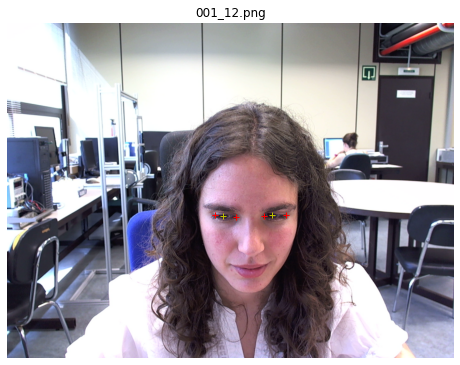

In [68]:
from IPython.display import clear_output
from time import sleep

for i in range(12):
    clear_output(wait=True)
    
    person = read_image(images[i])
    
    anot0_file = "DataIMG/labels/" + images[i][15:19] + 'image_labels.txt'
    anot0 = np.genfromtxt(anot0_file)
    anot0 = np.array(anot0[i:i + 1,1:]).reshape(12)
    
    plt.figure(figsize=(8,8))
    plt.imshow(person.permute(1,2,0))
    plt.plot(anot0[0],anot0[1],'+r')
    plt.plot(anot0[2],anot0[3],'+y') #Pupila izquierda
    plt.plot(anot0[4],anot0[5],'+r')
    plt.plot(anot0[6],anot0[7],'+r')
    plt.plot(anot0[8],anot0[9],'+y') #Pupila derecha
    plt.plot(anot0[10],anot0[11],'+r')
    plt.axis('off')
    plt.title(images[i][15:])
    plt.show()
    sleep(0.3)

Text(0.5, 1.0, '001_01.png')

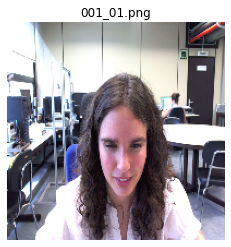

In [77]:
person = read_image(images[0])

anot0_file = "DataIMG/labels/" + images[0][15:19] + 'image_labels.txt'
anot0 = np.genfromtxt(anot0_file)
anot0 = np.array(anot0[0:1,1:]).reshape(12)

resize = transforms.Resize(size=(200,200))

plt.imshow(resize(person).permute(1,2,0))
plt.axis('off')
plt.title(images[0][15:])


In [78]:
print(person.shape)

torch.Size([3, 600, 800])


In [79]:
dy, dx = person.shape[1]/200, person.shape[2]/200
print(dy, dx)

3.0 4.0


In [80]:
print(anot0)
for i in range(12):
    if i == 0 or i % 2 ==0:
        anot0[i] = np.round(anot0[i]/dx)
    else:
        anot0[i] = np.round(anot0[i]/dy)
print(anot0)

[490.63 338.28 471.22 338.41 452.86 341.93 401.95 342.45 383.33 339.84
 362.63 338.41]
[123. 113. 118. 113. 113. 114. 100. 114.  96. 113.  91. 113.]


Text(0.5, 1.0, '001_01.png')

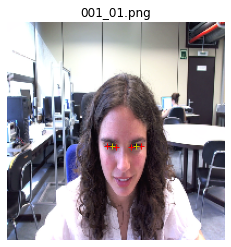

In [81]:
plt.imshow(resize(person).permute(1,2,0))


plt.plot(anot0[0],anot0[1],'+r')
plt.plot(anot0[2],anot0[3],'+y') #Pupila izquierda
plt.plot(anot0[4],anot0[5],'+r')
plt.plot(anot0[6],anot0[7],'+r')
plt.plot(anot0[8],anot0[9],'+y') #Pupila derecha
plt.plot(anot0[10],anot0[11],'+r')
plt.axis('off')
plt.title(images[0][15:])